In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math


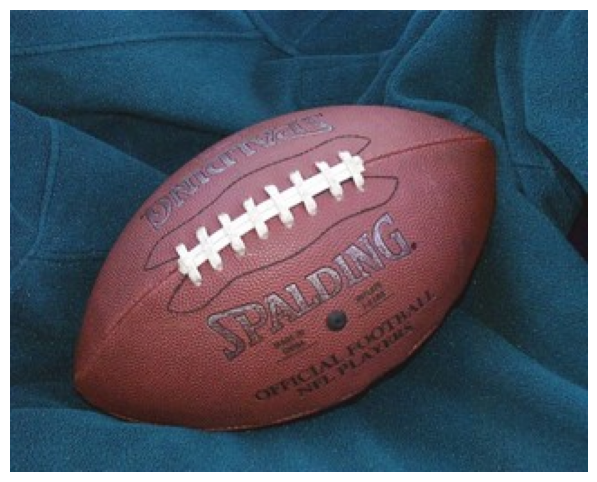

In [46]:

#exercice 1
img_bgr = cv2.imread("images/football.jpg")
assert img_bgr is not None, "Image introuvable (chemin incorrect ?)"

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,6))
plt.imshow(img_rgb)
plt.axis("off")
plt.show()


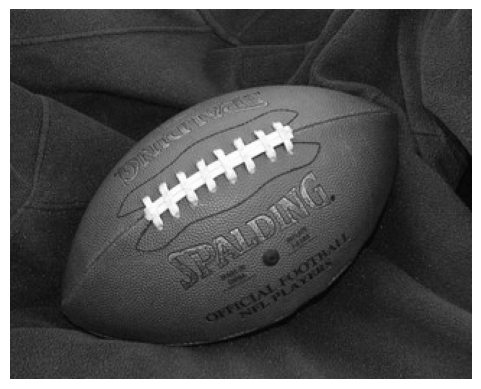

In [47]:
gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap="gray")
plt.axis("off")
plt.show()


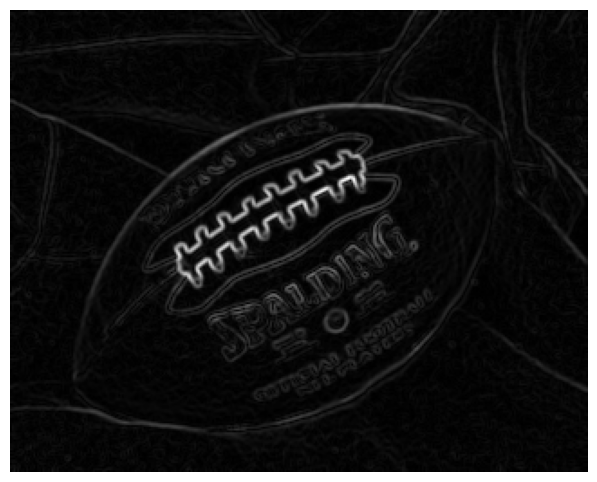

In [48]:
#ex1.1
k_size = 5

gx = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=k_size)
gy = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=k_size)

mag = cv2.magnitude(gx, gy)

plt.figure(figsize=(10,6))
plt.imshow(mag, cmap="gray")
plt.axis("off")
plt.show()

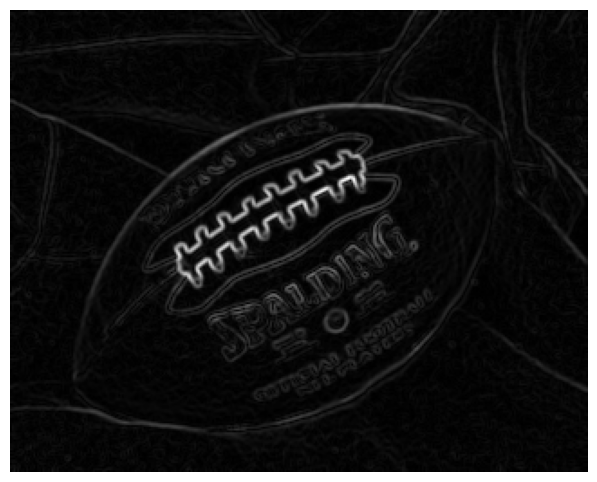

In [49]:
mag_255 = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
plt.figure(figsize=(10,6))
plt.imshow(mag_255, cmap="gray")
plt.axis("off")
plt.show()

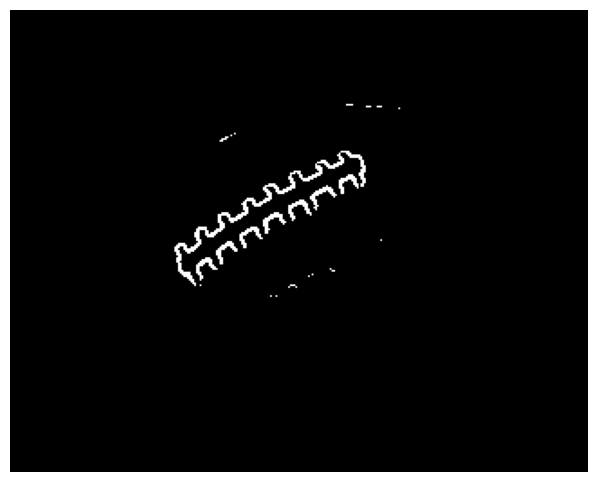

In [50]:
#ex 1.2
_, thresholded = cv2.threshold(mag_255, 100, maxval=255, type=cv2.THRESH_BINARY)
plt.figure(figsize=(10,6))
plt.imshow(thresholded, cmap="gray")
plt.axis("off")
plt.show()

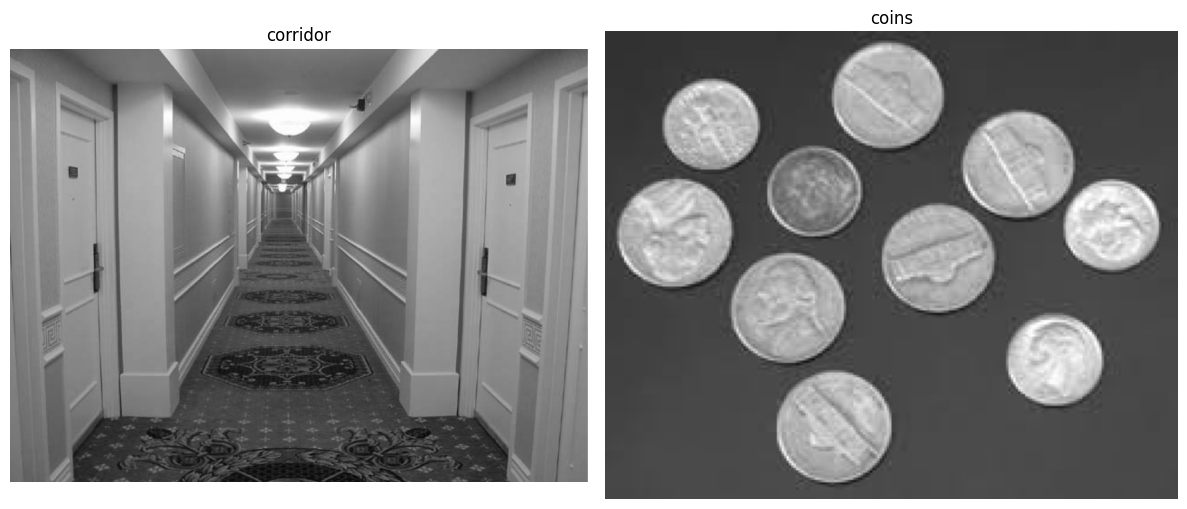

In [51]:
#ex2
img_corridor = cv2.imread("images/corridor.png")
img_coins = cv2.imread("images/coins.png")

img_corridor_rgb = cv2.cvtColor(img_corridor, cv2.COLOR_BGR2RGB)
img_coins_rgb    = cv2.cvtColor(img_coins, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.imshow(img_corridor_rgb)
plt.title("corridor")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img_coins_rgb)
plt.title("coins")
plt.axis("off")

plt.tight_layout()
plt.show()

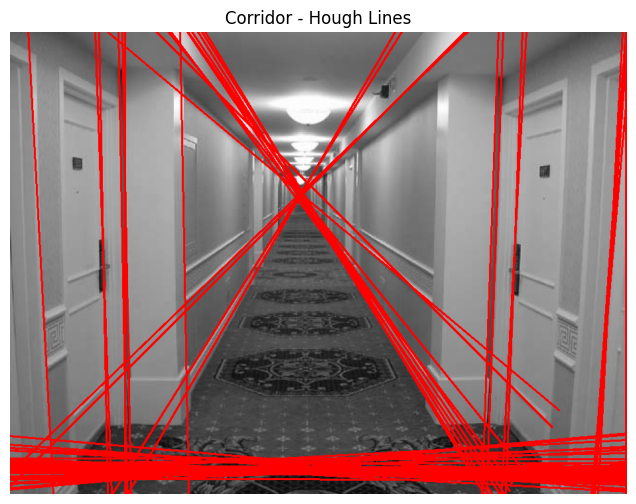

In [52]:
#ex2 corridor

gray_corridor = cv2.cvtColor(img_corridor_rgb, cv2.COLOR_RGB2GRAY)
edges_corridor = cv2.Canny(gray_corridor, 50, 150)

cdst_corridor = cv2.cvtColor(gray_corridor, cv2.COLOR_GRAY2BGR)

lines_corridor = cv2.HoughLines(edges_corridor, 1, np.pi/180, 195)

if lines_corridor is not None:
    for rho, theta in lines_corridor[:,0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho

        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))

        cv2.line(cdst_corridor, pt1, pt2, (0,0,255), 2)

plt.figure(figsize=(8,6))
plt.imshow(cv2.cvtColor(cdst_corridor, cv2.COLOR_BGR2RGB))
plt.title("Corridor - Hough Lines")
plt.axis("off")
plt.show()

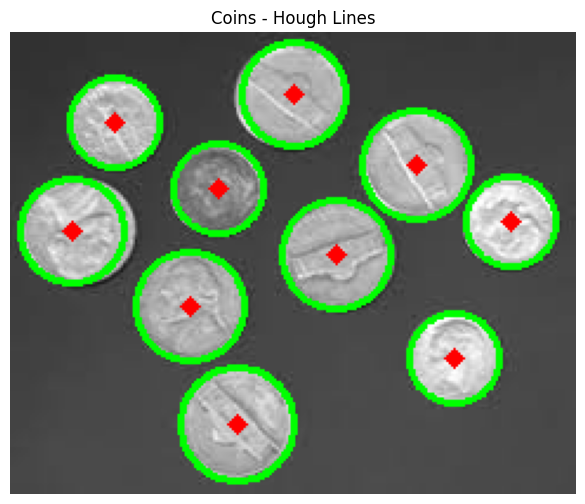

In [53]:
#ex2. coins
gray_coins = cv2.cvtColor(img_coins_rgb, cv2.COLOR_RGB2GRAY)
edges_coins = cv2.Canny(gray_coins, 50, 150)

cdst_coins = cv2.cvtColor(gray_coins, cv2.COLOR_GRAY2BGR)

circles = cv2.HoughCircles(gray_coins,cv2.HOUGH_GRADIENT,1,20,
                            param1=50,param2=45,minRadius=10,maxRadius=30)
 
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cdst_coins,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cdst_coins,(i[0],i[1]),2,(0,0,255),3)
 

plt.figure(figsize=(8,6))
plt.imshow(cv2.cvtColor(cdst_coins, cv2.COLOR_BGR2RGB))
plt.title("Coins - Hough Lines")
plt.axis("off")
plt.show()


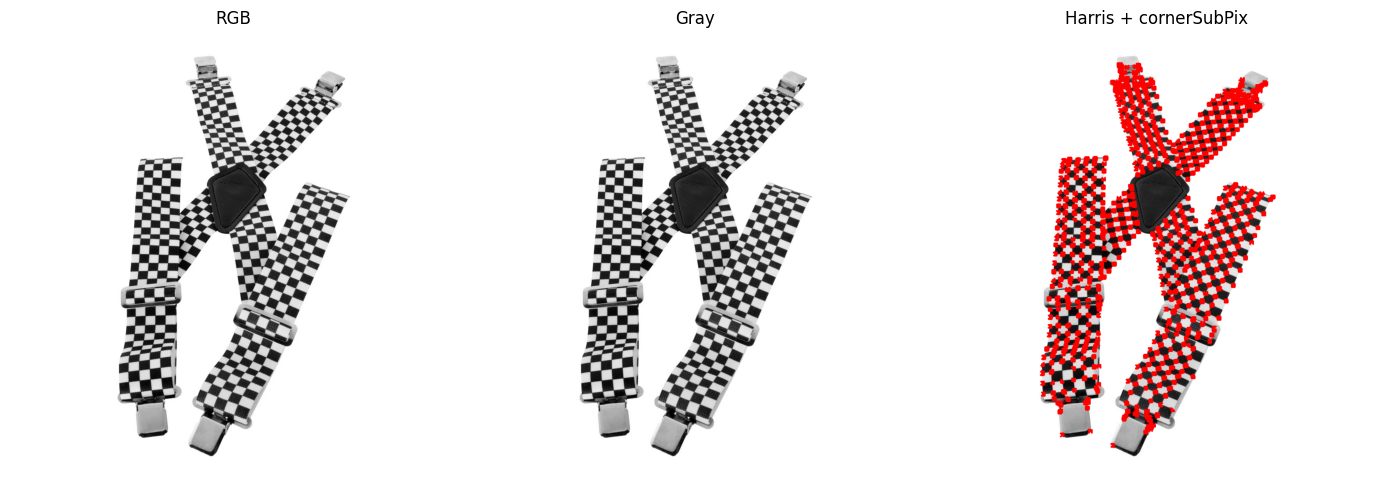

In [54]:
bretelle = cv2.imread("images/bretelle.jpg")

bretelle_rgb  = cv2.cvtColor(bretelle, cv2.COLOR_BGR2RGB)
gray          = cv2.cvtColor(bretelle, cv2.COLOR_BGR2GRAY)
gray_f        = np.float32(gray)

harris = cv2.cornerHarris(gray_f, blockSize=2, ksize=3, k=0.1)
kernel = np.ones((5,5), np.uint8)
harris = cv2.dilate(harris, kernel, iterations=3)

thr = 0.01 * harris.max()
ys, xs = np.where(harris > thr)

corners = np.stack([xs, ys], axis=1).astype(np.float32)
corners = corners.reshape(-1,1,2)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 40, 0.001)

cv2.cornerSubPix(gray, corners, (5,5), (-1,-1), criteria)

marked = bretelle_rgb.copy()

for pt in corners:
    x, y = pt.ravel()
    cv2.circle(marked, (int(x), int(y)), 3, (255,0,0), -1)

plt.figure(figsize=(14,5))

plt.subplot(1,3,1)
plt.imshow(bretelle_rgb); plt.title("RGB"); plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(gray, cmap="gray"); plt.title("Gray"); plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(marked); plt.title("Harris + cornerSubPix"); plt.axis("off")

plt.tight_layout()
plt.show()


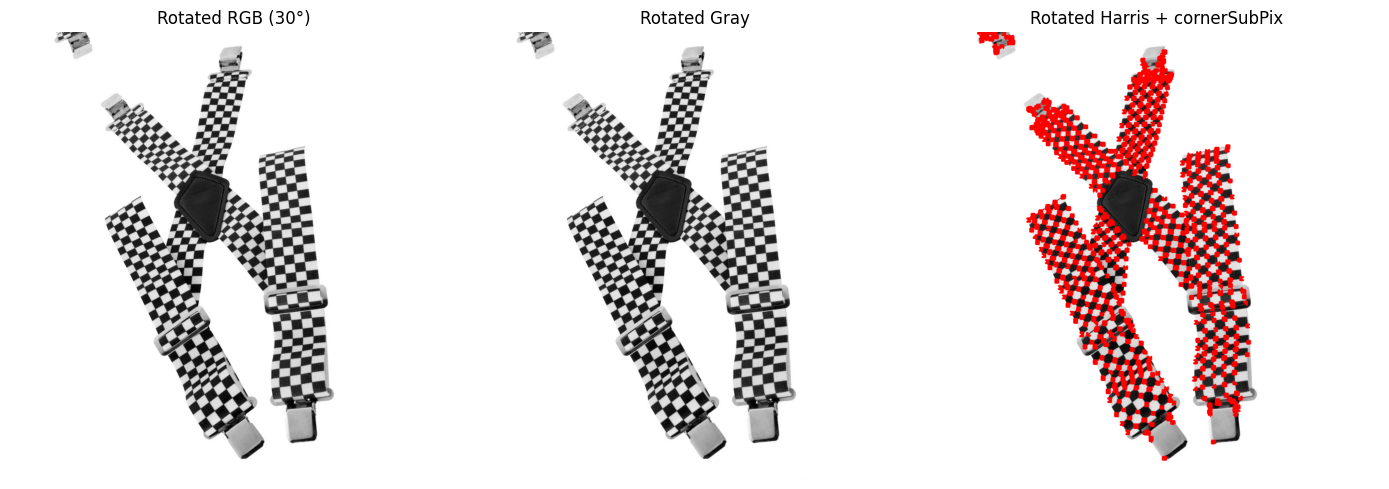

In [55]:
angle_deg = 30
h, w = bretelle.shape[:2]
M = cv2.getRotationMatrix2D((w/2, h/2), angle_deg, 1.0)

bretelle_rot = cv2.warpAffine(
    bretelle, M, (w, h),
    flags=cv2.INTER_LINEAR,
    borderMode=cv2.BORDER_REFLECT
)

rot_rgb  = cv2.cvtColor(bretelle_rot, cv2.COLOR_BGR2RGB)
rot_gray = cv2.cvtColor(bretelle_rot, cv2.COLOR_BGR2GRAY)
rot_f    = np.float32(rot_gray)

harris = cv2.cornerHarris(rot_f, blockSize=2, ksize=3, k=0.1)
kernel = np.ones((5,5), np.uint8)
harris = cv2.dilate(harris, kernel, iterations=3)

thr = 0.01 * harris.max()
ys, xs = np.where(harris > thr)
corners = np.stack([xs, ys], axis=1).astype(np.float32).reshape(-1, 1, 2)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 40, 0.001)
cv2.cornerSubPix(rot_gray, corners, (5,5), (-1,-1), criteria)

marked = rot_rgb.copy()
for x, y in corners.reshape(-1, 2):
    cv2.circle(marked, (int(round(x)), int(round(y))), 3, (255, 0, 0), -1)

plt.figure(figsize=(14,5))

plt.subplot(1,3,1)
plt.imshow(rot_rgb); plt.title(f"Rotated RGB ({angle_deg}°)"); plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(rot_gray, cmap="gray"); plt.title("Rotated Gray"); plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(marked); plt.title("Rotated Harris + cornerSubPix"); plt.axis("off")

plt.tight_layout()
plt.show()


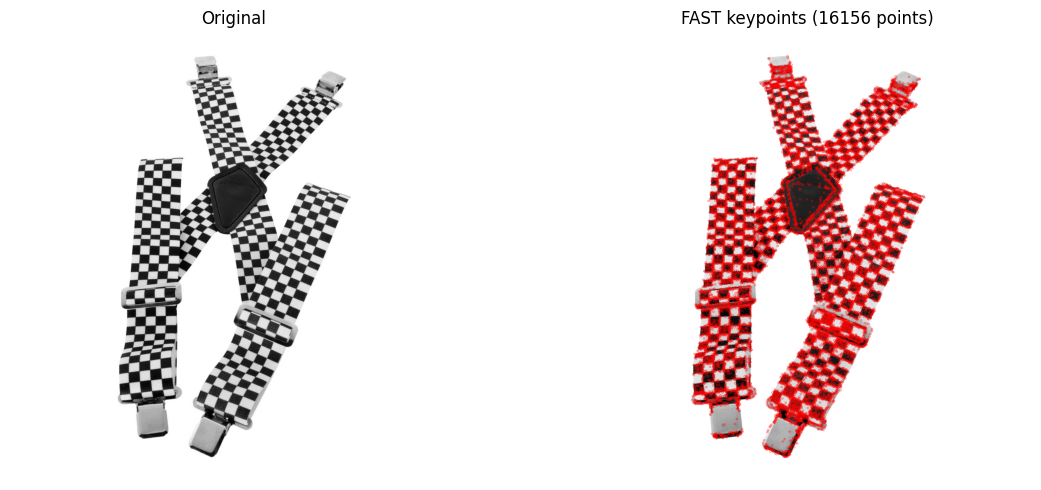

In [ ]:
#Ex4.FAST detector

bretelle_rgb = cv2.cvtColor(bretelle, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(bretelle, cv2.COLOR_BGR2GRAY)

fast = cv2.FastFeatureDetector_create()
kp = fast.detect(gray, None)

# draw keypoints
img_fast = cv2.drawKeypoints(
    bretelle_rgb, kp, None,
    color=(255,0,0),
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)


plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.imshow(bretelle_rgb)
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img_fast)
plt.title(f"FAST keypoints ({len(kp)} points)")
plt.axis("off")

plt.tight_layout()
plt.show()